In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

## City Weather Data for 500 Cities

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=638e60cb34fc106be7d2abdc7970aa54


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | gwadar
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | leticia
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | jalu
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | burica
City not found. Skipping...
Processing Record 16 of Set 1 | ostersund
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | el badari
City not found. Skipping...
Processing Record 19 of Set 1 | araouane
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | sale

Processing Record 42 of Set 4 | lithgow
Processing Record 43 of Set 4 | ballina
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | qostanay
Processing Record 46 of Set 4 | pekan nenas
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | aswan
Processing Record 50 of Set 4 | byron bay
Processing Record 1 of Set 5 | warri
Processing Record 2 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 3 of Set 5 | price
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | djenne
Processing Record 6 of Set 5 | ormara
Processing Record 7 of Set 5 | buy
Processing Record 8 of Set 5 | luwuk
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Set 5 | yerofey pavlovich
Processing Record 11 of Set 5 | mezhdurechensk
Processing Record 12 of Set 5 | maceio
Processing Record 13 of Set 5 | arraial do cabo
Processing Record 14 of Set 5 | chuy
Processing Recor

Processing Record 30 of Set 8 | port elizabeth
Processing Record 31 of Set 8 | port hedland
Processing Record 32 of Set 8 | kutum
Processing Record 33 of Set 8 | babanusah
City not found. Skipping...
Processing Record 34 of Set 8 | sterling
Processing Record 35 of Set 8 | cleveland
Processing Record 36 of Set 8 | mopipi
Processing Record 37 of Set 8 | ust-nera
Processing Record 38 of Set 8 | clyde river
Processing Record 39 of Set 8 | owando
Processing Record 40 of Set 8 | lata
Processing Record 41 of Set 8 | mahaicony
City not found. Skipping...
Processing Record 42 of Set 8 | popondetta
Processing Record 43 of Set 8 | asau
Processing Record 44 of Set 8 | tucuman
Processing Record 45 of Set 8 | praya
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | lima
Processing Record 48 of Set 8 | khormuj
City not found. Skipping...
Processing Record 49 of Set 8 | igrim
Processing Record 50 of Set 8 | bulgan
Processing Record 1 of Set 9 | bainbridge
Processing Record 2 of Se

Processing Record 16 of Set 12 | maua
Processing Record 17 of Set 12 | machali
Processing Record 18 of Set 12 | ixtapa
Processing Record 19 of Set 12 | iquitos
Processing Record 20 of Set 12 | ambilobe
Processing Record 21 of Set 12 | pullman
Processing Record 22 of Set 12 | megion
Processing Record 23 of Set 12 | ubinskoye
Processing Record 24 of Set 12 | buckeye
Processing Record 25 of Set 12 | uusikaupunki
Processing Record 26 of Set 12 | aquiraz
Processing Record 27 of Set 12 | henties bay
Processing Record 28 of Set 12 | leninskiy
Processing Record 29 of Set 12 | kungurtug
Processing Record 30 of Set 12 | amboasary
Processing Record 31 of Set 12 | sola
Processing Record 32 of Set 12 | fortuna
Processing Record 33 of Set 12 | benghazi
Processing Record 34 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 35 of Set 12 | santa quiteria do maranhao
Processing Record 36 of Set 12 | morant bay
Processing Record 37 of Set 12 | laje
Processing Record 38 of Set 12 | gay

In [8]:
len(city_data)

570

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gwadar,25.1216,62.3254,73.65,31,0,17.90,PK,2021-11-15 03:09:33
1,Mataura,-46.1927,168.8643,62.73,52,100,3.62,NZ,2021-11-15 03:09:33
2,Esperance,-33.8667,121.9000,73.26,44,94,14.00,AU,2021-11-15 03:09:34
3,Souillac,-20.5167,57.5167,80.37,66,15,10.58,MU,2021-11-15 03:09:34
4,Tuktoyaktuk,69.4541,-133.0374,12.65,94,100,9.53,CA,2021-11-15 03:09:35
5,Saint George,37.1041,-113.5841,60.80,40,1,1.01,US,2021-11-15 03:09:36
6,Busselton,-33.6500,115.3333,76.08,41,79,4.32,AU,2021-11-15 03:09:36
7,Leticia,-4.2153,-69.9406,78.85,94,75,3.44,CO,2021-11-15 03:06:30
8,Dikson,73.5069,80.5464,-9.02,100,100,6.17,RU,2021-11-15 03:09:37
9,Jalu,29.0331,21.5482,64.20,53,70,11.48,LY,2021-11-15 03:09:37


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df =city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gwadar,PK,2021-11-15 03:09:33,25.1216,62.3254,73.65,31,0,17.90
1,Mataura,NZ,2021-11-15 03:09:33,-46.1927,168.8643,62.73,52,100,3.62
2,Esperance,AU,2021-11-15 03:09:34,-33.8667,121.9000,73.26,44,94,14.00
3,Souillac,MU,2021-11-15 03:09:34,-20.5167,57.5167,80.37,66,15,10.58
4,Tuktoyaktuk,CA,2021-11-15 03:09:35,69.4541,-133.0374,12.65,94,100,9.53
5,Saint George,US,2021-11-15 03:09:36,37.1041,-113.5841,60.80,40,1,1.01
6,Busselton,AU,2021-11-15 03:09:36,-33.6500,115.3333,76.08,41,79,4.32
7,Leticia,CO,2021-11-15 03:06:30,-4.2153,-69.9406,78.85,94,75,3.44
8,Dikson,RU,2021-11-15 03:09:37,73.5069,80.5464,-9.02,100,100,6.17
9,Jalu,LY,2021-11-15 03:09:37,29.0331,21.5482,64.20,53,70,11.48


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## Plotting 

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

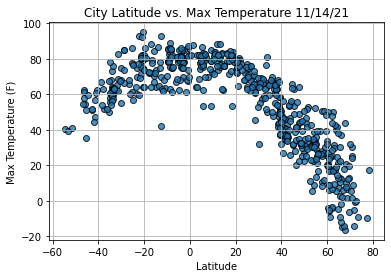

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

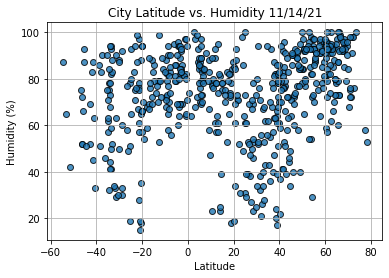

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

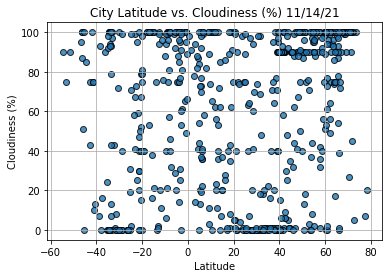

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

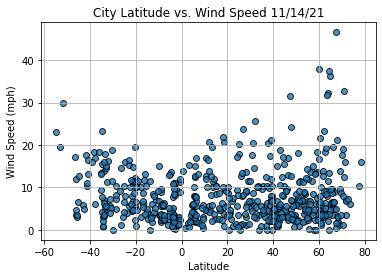

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()